<a href="https://colab.research.google.com/github/bharaththolikonda/DS/blob/main/Perform_PCA_and_clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Perform Principal component analysis and perform clustering using first 3 principal component scores**
# (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data bold text(class column we have ignored at the begining who shows it has 3 clusters)df


In [12]:
from google.colab import files
upload=files.upload()


Saving wine.csv to wine (1).csv


In [13]:
import numpy as np
import pandas as pd
df=pd.read_csv("wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [14]:

df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [15]:

len(list(df))

14

In [16]:
X = df.drop('Type', axis=1)
Y=df["Type"]

In [17]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
principal_components=pca.fit_transform(df)

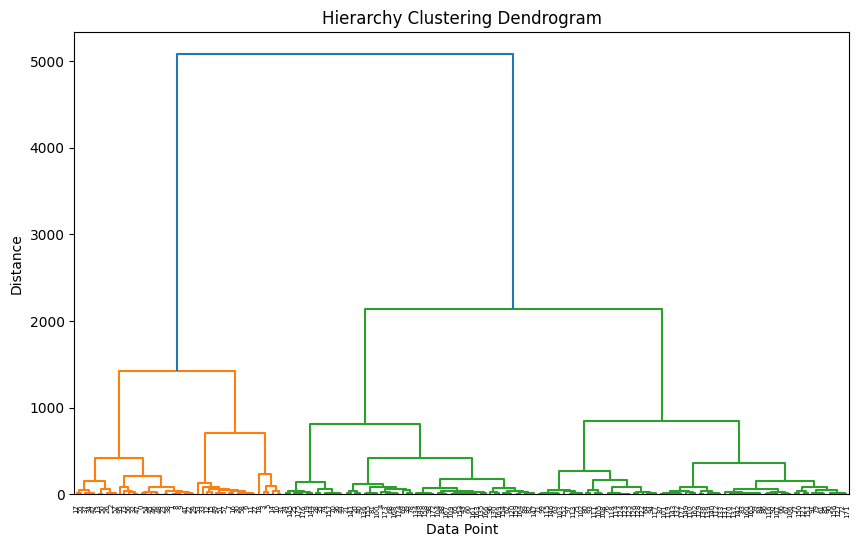

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_metrix=linkage(principal_components,method="ward")
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
dendrogram(linkage_metrix)
plt.title("Hierarchy Clustering Dendrogram")
plt.xlabel("Data Point")
plt.ylabel("Distance")
plt.show()

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia=[]
silhouette_scores = []
for k in range (2,13):
   kmeans= KMeans(n_clusters=k)
   kmeans.fit(principal_components)
   inertia.append(kmeans.inertia_)
   silhouette_scores.append(silhouette_score(principal_components,kmeans.labels_))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

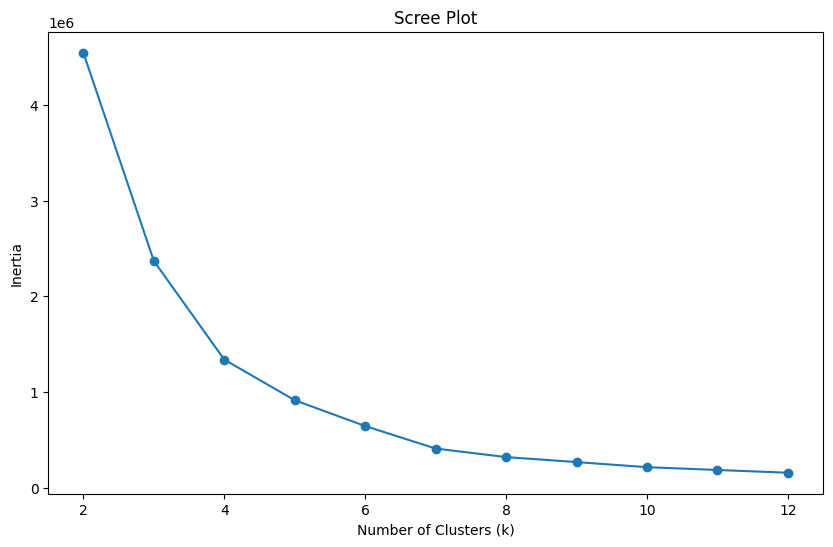

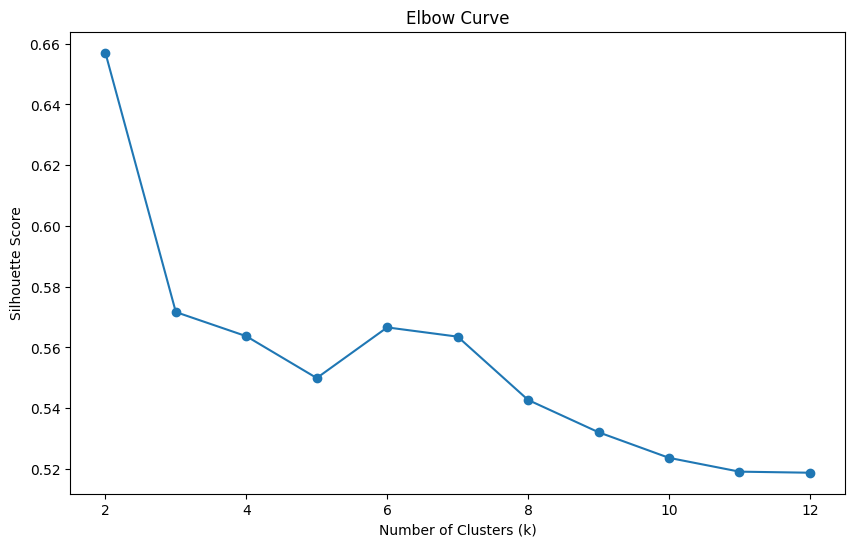

In [25]:
# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(2, 13), inertia, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(2, 13), silhouette_scores, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [26]:
optimal_k = np.argmax(silhouette_scores) + 2  # Add 2 because range starts from 2
print("Optimum number of clusters:", optimal_k)

Optimum number of clusters: 2


In [27]:
original_clusters= df['Type'].nunique()
print("Original number of clusters:", original_clusters)


Original number of clusters: 3
